In [117]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import pandas_profiling as pp
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
#  READING IN DATA
pre_and_flight = pd.read_pickle('../data/experiment/processed/pre_and_flight_merged.pkl')
#postflight = pd.read_pickle('../data/experiment/processed/postflight_merged.pkl')



In [5]:
pre_and_flight['timeStamp'] = pre_and_flight.timeStamp.dt.tz_localize(None)

In [13]:
# Sort DF by timeStamp
pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
pre_and_flight.reset_index(inplace=True)
pre_and_flight.timeStamp

0     2019-03-11 07:45:58
1     2019-03-11 07:46:03
2     2019-03-11 07:46:08
3     2019-03-11 07:46:14
4     2019-03-11 07:46:19
5     2019-03-11 07:46:25
6     2019-03-11 07:46:30
7     2019-03-11 07:46:36
8     2019-03-11 07:46:41
9     2019-03-11 07:46:46
10    2019-03-11 07:46:52
11    2019-03-11 07:46:58
12    2019-03-11 07:47:03
13    2019-03-11 07:47:08
14    2019-03-11 07:47:14
15    2019-03-11 07:47:20
16    2019-03-11 07:47:25
17    2019-03-11 07:47:30
18    2019-03-11 07:47:35
19    2019-03-11 07:47:40
20    2019-03-11 07:47:46
21    2019-03-11 07:47:51
22    2019-03-11 07:47:58
23    2019-03-11 07:48:04
24    2019-03-11 07:48:09
25    2019-03-11 07:48:15
26    2019-03-11 07:48:20
27    2019-03-11 07:48:27
28    2019-03-11 07:48:32
29    2019-03-11 07:48:38
30    2019-03-11 07:48:43
31    2019-03-11 07:48:48
32    2019-03-11 07:48:53
33    2019-03-11 07:48:58
34    2019-03-11 07:49:04
35    2019-03-11 07:49:09
36    2019-03-11 07:49:14
37    2019-03-11 07:49:19
38    2019-0

In [14]:
#pre_and_flight.timeStamp = 
pre_and_flight.timeStamp +  pd.Timedelta('1 hour')

0     2019-03-11 08:45:58
1     2019-03-11 08:46:03
2     2019-03-11 08:46:08
3     2019-03-11 08:46:14
4     2019-03-11 08:46:19
5     2019-03-11 08:46:25
6     2019-03-11 08:46:30
7     2019-03-11 08:46:36
8     2019-03-11 08:46:41
9     2019-03-11 08:46:46
10    2019-03-11 08:46:52
11    2019-03-11 08:46:58
12    2019-03-11 08:47:03
13    2019-03-11 08:47:08
14    2019-03-11 08:47:14
15    2019-03-11 08:47:20
16    2019-03-11 08:47:25
17    2019-03-11 08:47:30
18    2019-03-11 08:47:35
19    2019-03-11 08:47:40
20    2019-03-11 08:47:46
21    2019-03-11 08:47:51
22    2019-03-11 08:47:58
23    2019-03-11 08:48:04
24    2019-03-11 08:48:09
25    2019-03-11 08:48:15
26    2019-03-11 08:48:20
27    2019-03-11 08:48:27
28    2019-03-11 08:48:32
29    2019-03-11 08:48:38
30    2019-03-11 08:48:43
31    2019-03-11 08:48:48
32    2019-03-11 08:48:53
33    2019-03-11 08:48:58
34    2019-03-11 08:49:04
35    2019-03-11 08:49:09
36    2019-03-11 08:49:14
37    2019-03-11 08:49:19
38    2019-0

In [15]:
#Wichtige Zeitpunkte:
#- Ende Late Access (LA) 11.03.2019  07:45:58
end_late_access = pd.to_datetime('2019-03-11 07:45:58') +  pd.Timedelta('1 hour')
# Just a convenient cut off point to remove end_late_access later in plots
flight_start = pd.to_datetime('2019-03-11 10:01') 
#- Lift-Off (LO) 11.03.2019  10:19:56  --- 11.03.2019 10:20:00 1552296000 Lift-Off (LO)
lift_off = pd.to_datetime('2019-03-11 10:20:00') 
#- De-Spin (keine Rotierung der Rakete) ~ Nullbewegung in alle Richtungen im Video nach 1 min 7s 38 ms nach LO
de_spin = lift_off + pd.Timedelta('1 minutes 7 seconds')
#- Ende des Raketenantriebs (Motorabwurf, keine Beschleunigung, keine Hypergravitation) 1 min 10 s 20 ms nach LO
end_rocket_propulsion = lift_off + pd.Timedelta('1 minutes 10 seconds')
#- Apogee (Zeitpunkt zu dem die Rakete den höchsten Höhenmeter erreicht hat) 124,4 Sekunden nach LO (errreichte Höhe 82,184 km)
apogee = lift_off + pd.Timedelta('124 seconds')
#- Auswurf 1. Fallschirm ~ 5 min 55 s nach LO
parachute_1 = lift_off + pd.Timedelta('5 minutes 55 seconds')
#- Auswurf 2. Fallschirm ~ 6 min 20 s nach LO
parachute_2 = lift_off + pd.Timedelta('6 minutes 20 seconds')
#- Zeitpunkt der Landung 11.03.2019 10:33:41.800000
landing = pd.to_datetime('2019-03-11 10:33:41')

In [16]:
# Sort DF by timeStamp
pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
#postflight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)

In [17]:
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

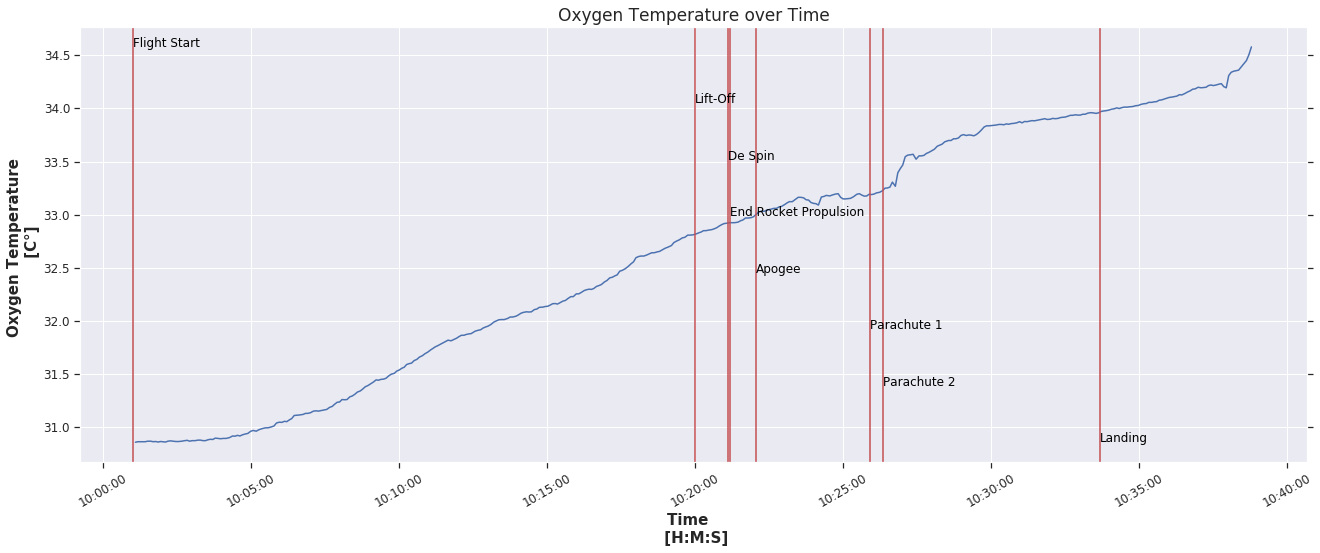

In [166]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
#ns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=8))
y_event_locations = y_event_locations[::-1]

plt.text(flight_start,y_event_locations[0] , 'Flight Start', horizontalalignment='left', size='medium', color='black')
plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='medium', color='black')
plt.text(de_spin, y_event_locations[2], 'De Spin', horizontalalignment='left', size='medium', color='black')
plt.text(end_rocket_propulsion, y_event_locations[3], 'End Rocket Propulsion', horizontalalignment='left', size='medium', color='black')
plt.text(apogee, y_event_locations[4], 'Apogee', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_1, y_event_locations[5], 'Parachute 1', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_2, y_event_locations[6], 'Parachute 2', horizontalalignment='left', size='medium', color='black')
plt.text(landing, y_event_locations[7], 'Landing', horizontalalignment='left', size='medium', color='black')

# Plot Labels
plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')
# Show the minor grid lines with very faint and almost transparent grey lines
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()